## Part D - Un-Supervised Machine Learning Methods (Clustering)


### Scenario : Mall Customer Segmentation Data


#### Task 1   	Data Preparation 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings                   
warnings.filterwarnings('ignore')

In [2]:
#importing mall customer report

mall_customer =pd.read_csv("Mall_Customers.csv")
mall_customer.head(-5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,21.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40
...,...,...,...,...,...
190,191,Female,34.0,103,23
191,192,Female,32.0,103,69
192,193,Male,33.0,113,8
193,194,Female,38.0,113,91


In [3]:
mall_customer.shape

(200, 5)

In [4]:
#checking null values in the dataset
mall_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       1
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
row_null = mall_customer[mall_customer.isnull().any(axis=1)]
row_null

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
20,21,Male,NaN,24,35


In [6]:
#filling null value with average age
mall_customer['Age'].fillna(value=mall_customer['Age'].mean(), inplace = True)

In [7]:
mall_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
unique_value = mall_customer['Gender'].unique()
unique_value

array(['Male', 'Female', '0'], dtype=object)

In [9]:
value_0 =mall_customer[mall_customer['Gender'] == '0']
value_0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
43,44,0,31.0,39,61


In [10]:
#replacing wrong entry
mall_customer['Gender'].replace({'0': 'Female'}, inplace=True)

In [11]:
unique_value = mall_customer['Gender'].unique()
unique_value

array(['Male', 'Female'], dtype=object)

In [12]:
duplicated_values = mall_customer[mall_customer.duplicated()]
duplicated_values

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mall_customer['Gender']= label_encoder.fit_transform(mall_customer['Gender'])
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15,39
1,2,1,21.0,15,81
2,3,0,20.0,16,6
3,4,0,23.0,16,77
4,5,0,31.0,17,40


In [14]:
mall_customer.drop(columns='CustomerID', inplace=True)

In [15]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    int32  
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 5.6 KB


In [16]:
mall_customer.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.869347,60.560000,50.200000
std,0.497633,13.966328,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


#### Data Exploration

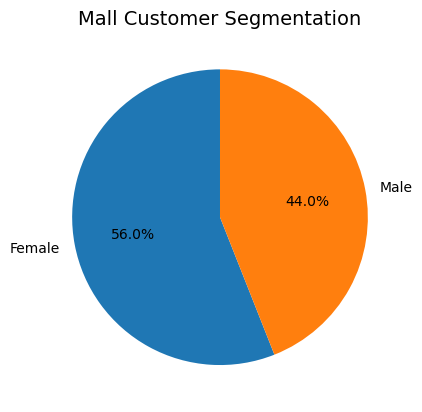

In [17]:
#Plotting a pie chart
gender_count = mall_customer['Gender'].value_counts()
custom_labels = ['Female', 'Male']
plt.pie(gender_count, labels=custom_labels, autopct='%1.1f%%', startangle=90)
plt.title('Mall Customer Segmentation', fontsize=14)
plt.show()

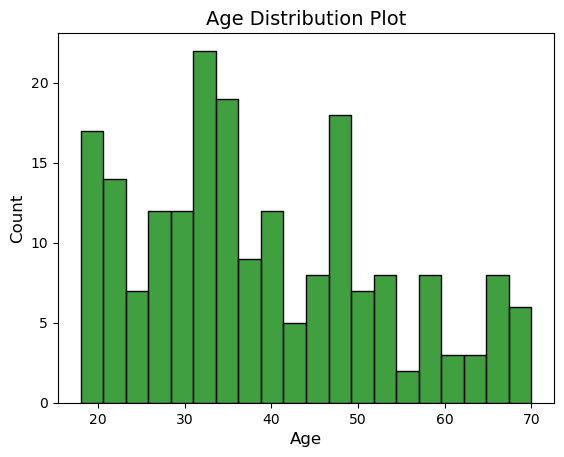

In [18]:
#Age distribution plot

sns.histplot(mall_customer['Age'], color='green', bins=20)
plt.title('Age Distribution Plot', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

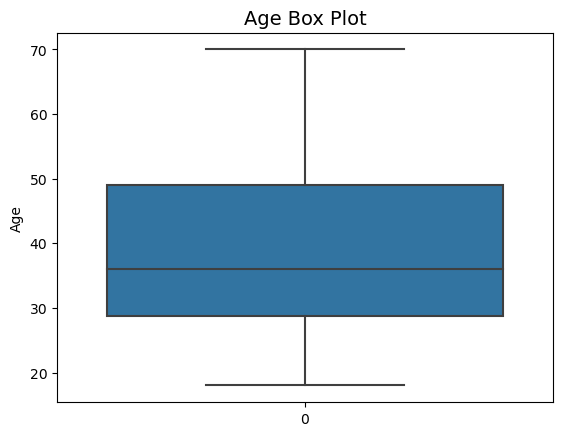

In [19]:
sns.boxplot(mall_customer['Age'])
plt.title('Age Box Plot',fontsize=14)
plt.ylabel('Age')
plt.show()

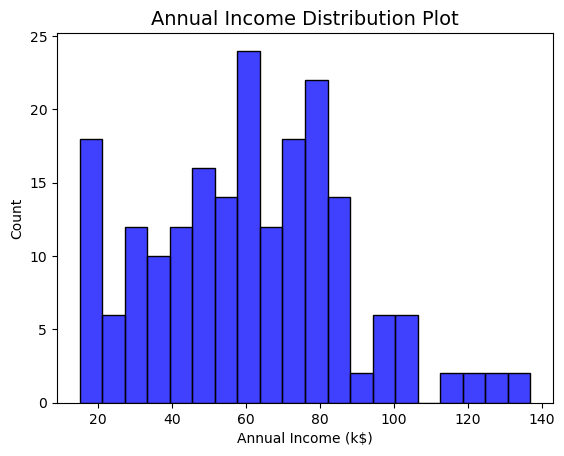

In [20]:
#Annual Income (k$) distribution plot

sns.histplot(mall_customer['Annual Income (k$)'], color='blue', bins=20)
plt.title('Annual Income Distribution Plot', fontsize=14)
plt.show()

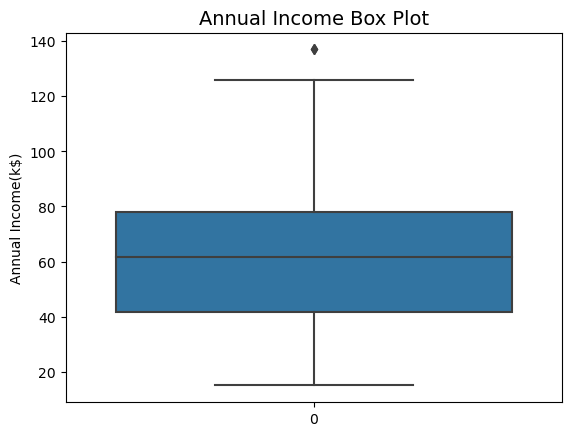

In [21]:
sns.boxplot(mall_customer['Annual Income (k$)'])
plt.title('Annual Income Box Plot', fontsize=14)
plt.ylabel('Annual Income(k$)')
plt.show()

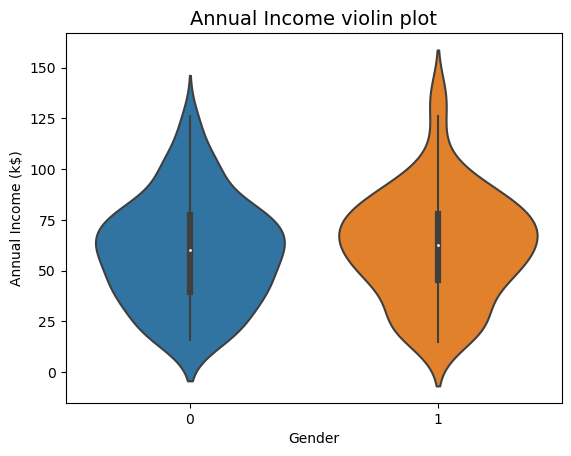

In [22]:
# violin plot for 'Annual Income' vs 'Gender'
sns.violinplot(y = 'Annual Income (k$)' , x = 'Gender' , data = mall_customer)
plt.title('Annual Income violin plot', fontsize = 14)
plt.show()

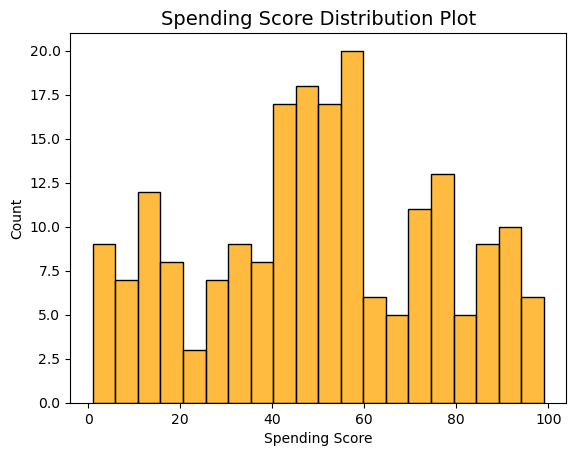

In [23]:
#Spending distribution plot

sns.histplot(mall_customer['Spending Score (1-100)'], color='orange', bins=20)
plt.title('Spending Score Distribution Plot', fontsize=14)
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

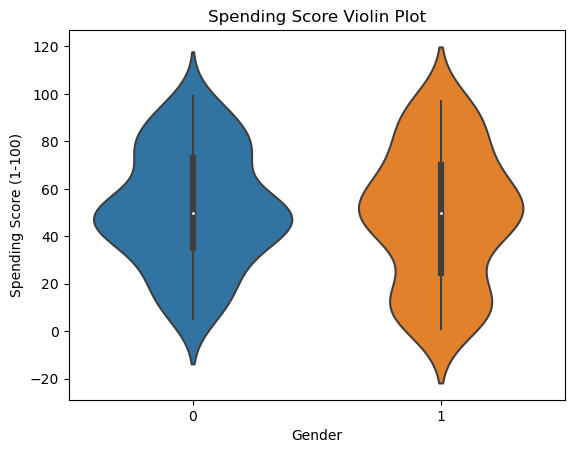

In [24]:
#violin plot for 'Spending Score (1-100)'

sns.violinplot(y= 'Spending Score (1-100)', x='Gender', data=mall_customer)
plt.title('Spending Score Violin Plot')
plt.show()

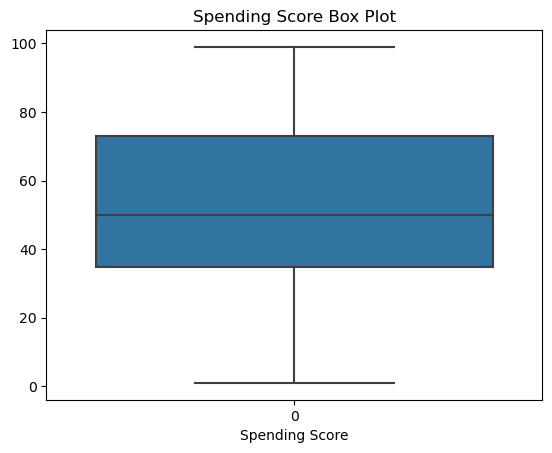

In [25]:
sns.boxplot(mall_customer['Spending Score (1-100)'])
plt.title('Spending Score Box Plot')
plt.xlabel('Spending Score')
plt.show()

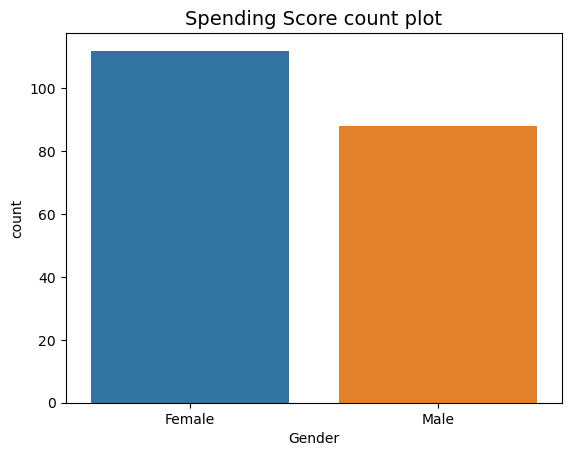

In [26]:
# count plot for 'Gender'
custom_label = ['Female', 'Male']
sns.countplot(x='Gender', data=mall_customer)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Spending Score count plot', fontsize = 14)

plt.show()

In [27]:
correlation_matrix = mall_customer.corr()
correlation_matrix

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.062446,0.056410,-0.058109
Age,0.062446,1.000000,-0.014338,-0.328109
Annual Income (k$),0.056410,-0.014338,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.328109,0.009903,1.000000


<Axes: >

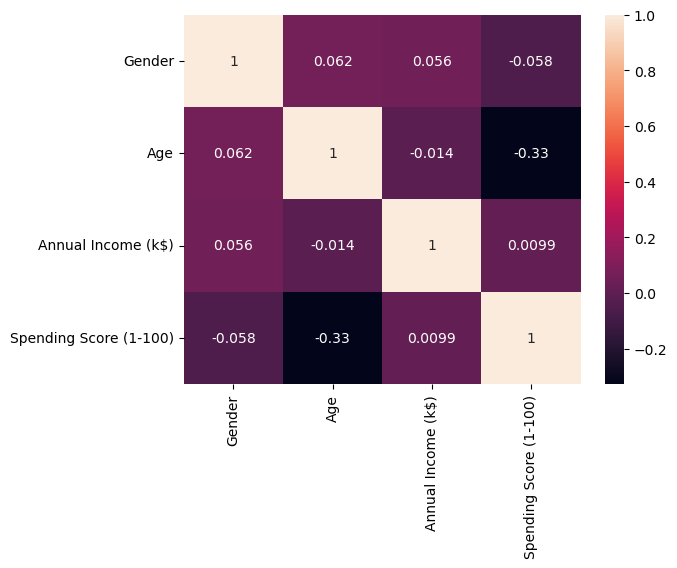

In [28]:
#finding correlation by using heatmap

sns.heatmap(mall_customer.corr(), annot=True)

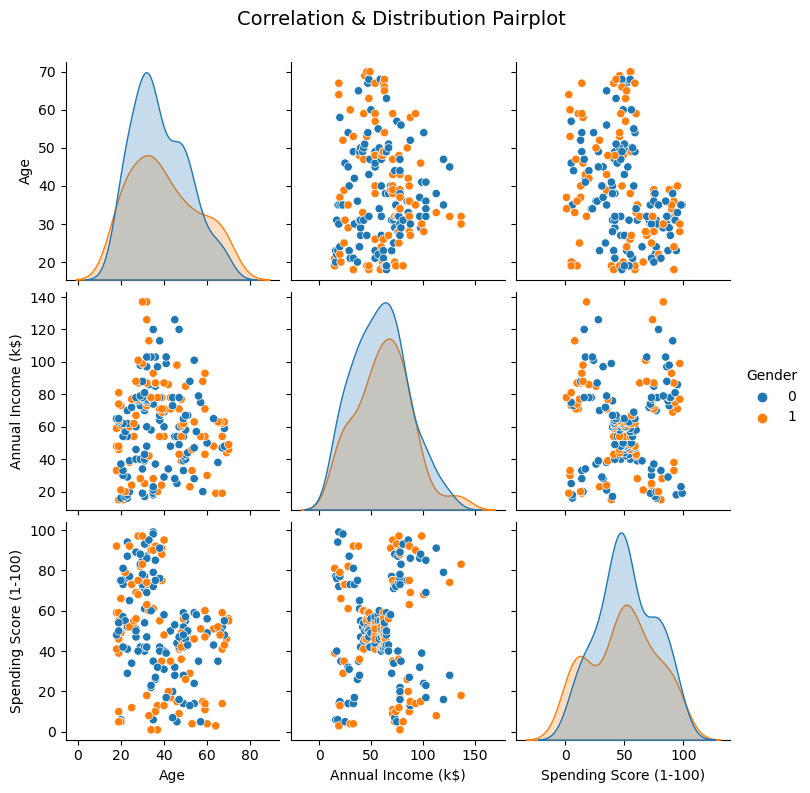

In [29]:
sns.pairplot(data=mall_customer, hue='Gender')
plt.suptitle("Correlation & Distribution Pairplot", fontsize=14, y=1.05)
plt.show()

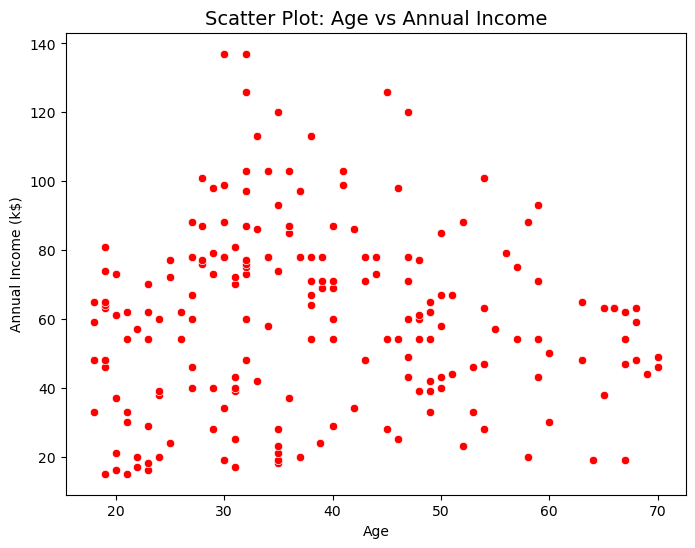

In [30]:
# Scatter plot for Age vs Annual Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_customer, color='red', marker='o')
plt.title('Scatter Plot: Age vs Annual Income', fontsize=14)

# Show the plot
plt.show()

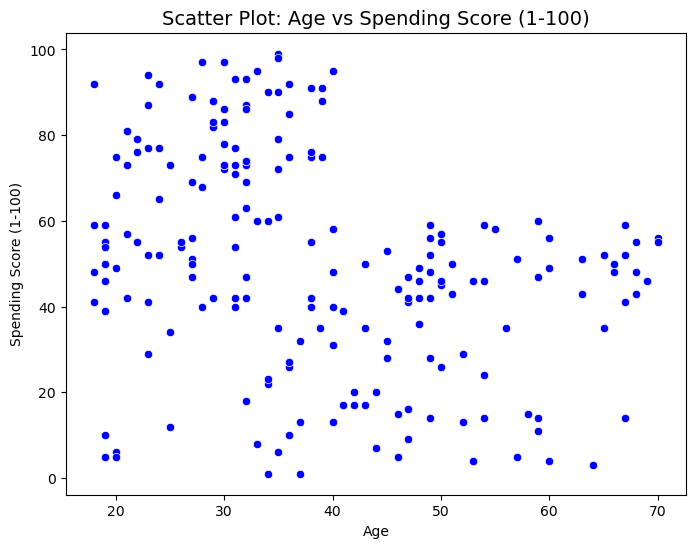

In [31]:
# Scatter plot for Age vs Spending Score (1-100)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_customer, color='blue', marker='o')
plt.title('Scatter Plot: Age vs Spending Score (1-100)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()

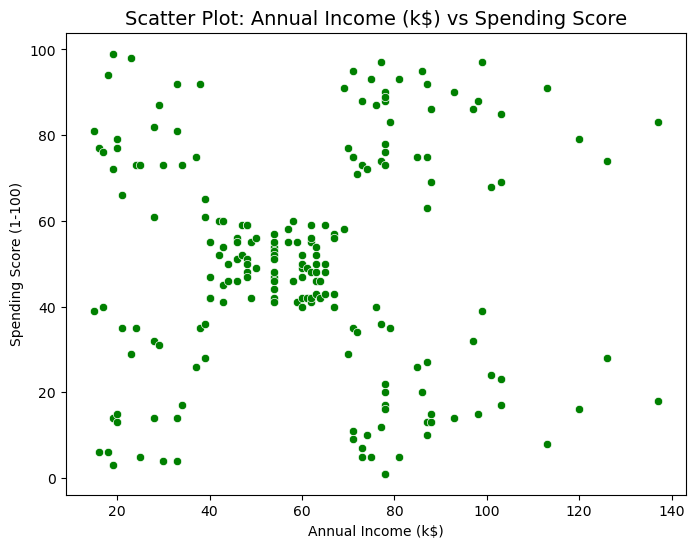

In [32]:
# Scatter plot for Anual Income vs Spending Score (1-100)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_customer, color='green', marker='o')
plt.title('Scatter Plot: Annual Income (k$) vs Spending Score', fontsize=14)

# Show the plot
plt.show()

### Task 2   	Unsupervised Algorithm Implementation   

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [34]:
# Let's start analysis by creating a subset dataframe
X = mall_customer[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
print(X.head(5))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [35]:
# Scale the features

scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)
print(X_kmeans)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [36]:
# Applying the elbow method to determine the number of clusters

wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

wcss

[400.0,
 269.6910121927639,
 157.70400815035947,
 108.92131661364357,
 65.56840815571682,
 55.057348270386,
 44.86475569922556,
 37.22818767758588,
 32.39226763033116,
 29.981897788243693]

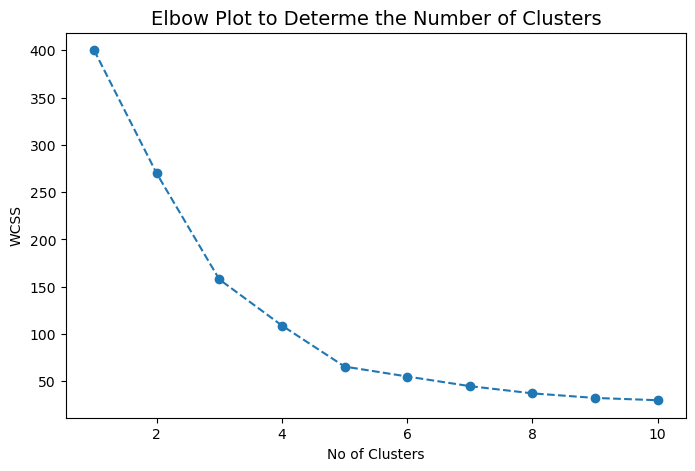

In [37]:
#Plotting the Elbow Plot to determine the ideal number of clusters

plt.figure(figsize=(8,5))

plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Plot to Determe the Number of Clusters', fontsize=14)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

In [38]:
# Identifying the Knee in the Elbow Plot with KneeLocator function
# First install the latest Kneed module 
!pip install --upgrade kneed
from kneed import KneeLocator

In [39]:
# Knee
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print('\nThe Knee located clusters:', kl.elbow)


The Knee located clusters: 5


In [40]:
# Applying the Silhouette method to determine the number of clusters

silhouette_coef = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(X_kmeans)
    score = silhouette_score(X_kmeans, kmeans.labels_)
    silhouette_coef.append(score)

silhouette_coef

[0.29512063001659344,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5398800926790663,
 0.5256026931619203,
 0.4541279523637649,
 0.4566624374485964,
 0.4487229314026326]

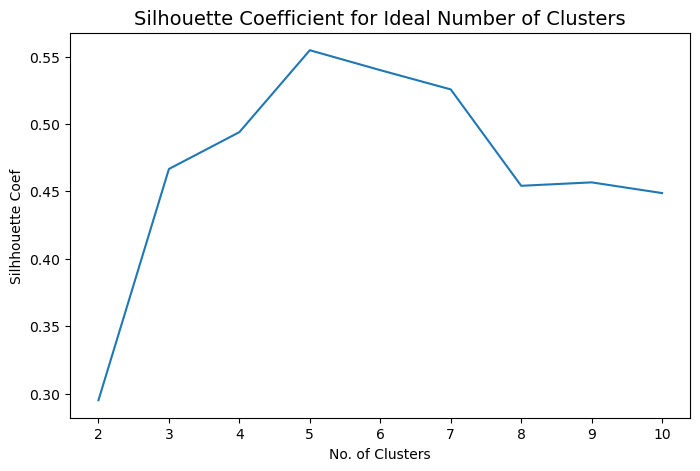

In [41]:
# Plot the Silhouette Coefficient data

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2,11))
plt.title('Silhouette Coefficient for Ideal Number of Clusters', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhhouette Coef')
plt.show()

* Silhouette figure shows total 5 number of clusters

In [42]:
# Model fitting with 5 clusters 

clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [43]:
# Creating a New Dataframe with an appended cluster column

#making a copy of original dataframe
df_Kmeans = mall_customer.copy() 

#appending the cluster column
df_Kmeans['Cluster'] = y_kmeans  
print(df_Kmeans.head(5))

   Gender   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1  19.0                  15                      39        4
1       1  21.0                  15                      81        2
2       0  20.0                  16                       6        4
3       0  23.0                  16                      77        2
4       0  31.0                  17                      40        4


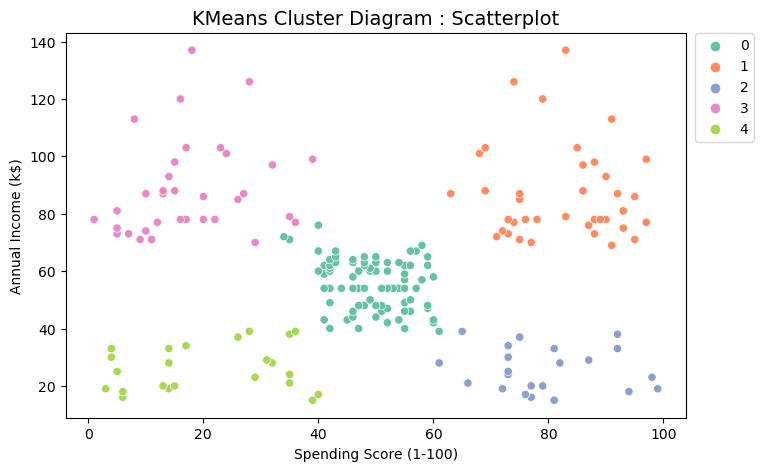

In [44]:
#Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('KMeans Cluster Diagram : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Kmeans, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.11, 1), loc='best', borderaxespad=0)
plt.show()

In [45]:
#Let's start the Hierarchial analysis by normalizing the data and 
#building a dataframe for analysis

norm = MinMaxScaler()

X_Hierar = norm.fit_transform(X)
X_Hierar = pd.DataFrame(X_Hierar, columns=X.columns)
print(X_Hierar.head(5))

   Annual Income (k$)  Spending Score (1-100)
0            0.000000                0.387755
1            0.000000                0.816327
2            0.008197                0.051020
3            0.008197                0.775510
4            0.016393                0.397959


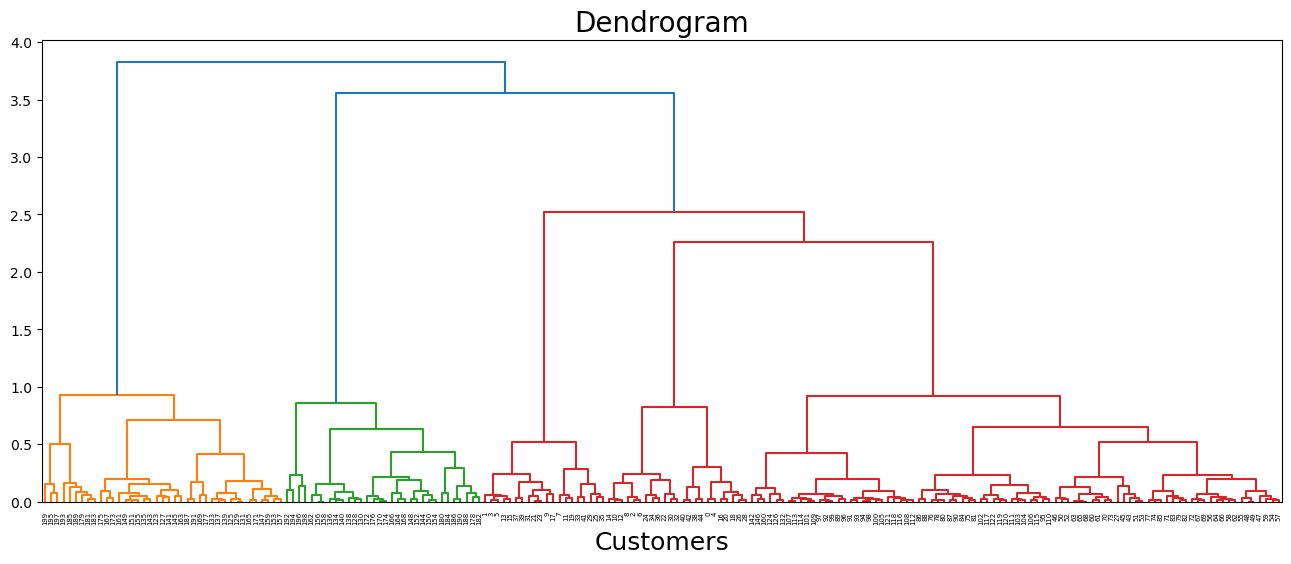

In [46]:
# Build dendrogram to find out the optimal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)

plt.show()

* We can identify major 5 clusters from this dendrogram

In [47]:
#Creating a New Dataframe with an appended cluster column

df_Hierar = mall_customer.copy()   # making a copy of original dataframe
df_Hierar['Cluster'] = y_kmeans  # appending the cluster column
print(df_Hierar.head(5))

   Gender   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1  19.0                  15                      39        4
1       1  21.0                  15                      81        2
2       0  20.0                  16                       6        4
3       0  23.0                  16                      77        2
4       0  31.0                  17                      40        4


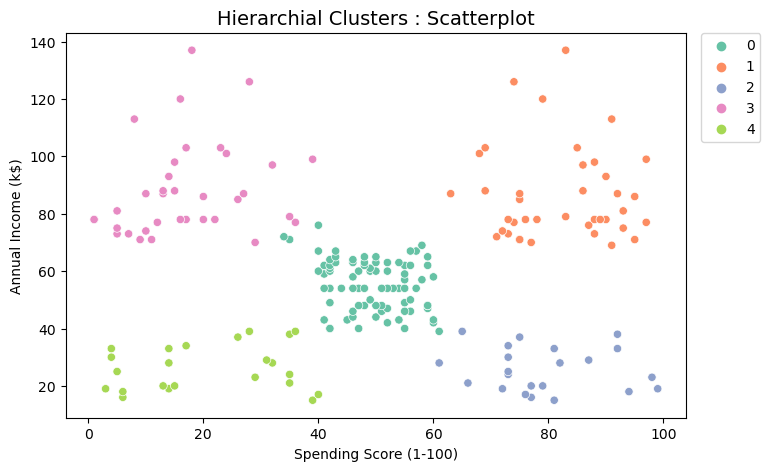

In [48]:
# Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.12, 1), loc='best', borderaxespad=0)
plt.show()

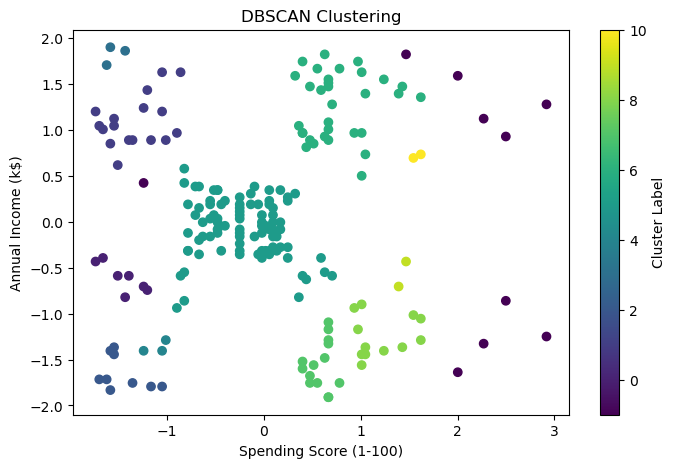

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Standardize the data (optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)  # Assuming X is your data

# Instantiate and fit DBSCAN
eps = 0.3  
min_samples = 2  
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_data)

# Extract cluster labels
cluster_labels = dbscan.labels_

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster Label')
plt.show()

* All three algorithms DBSCAN Clustering, Hierarchial clusters and KMeans Clusters remains provides the same cluster information.

K-Means algorithm generated the following 5 clusters:

clients with low annual income and high spending score
clients with medium annual income and medium spending score
clients with high annual income and low spending score
clients with high annual income and high spending score
clients with low annual income and low spending score
There are no distinct groups is terms of customers age.

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(mall_customer)

pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(scaled_data))
pca.explained_variance_ratio_

array([0.33724167, 0.26233677, 0.23246706, 0.16795449])

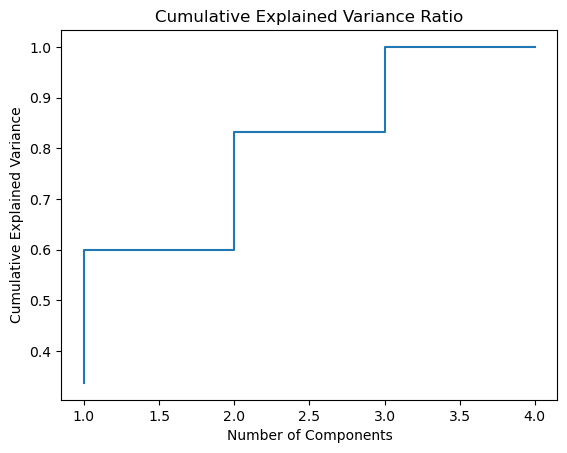

In [53]:
# Plot cumulative explained variance ratio
plt.step(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

In [55]:
pca_df = pca_df.drop(columns=[2,3])
pca_df.head()

,0,1
0,-0.399921,-0.522871
1,-1.420246,-0.372649
2,0.053276,-1.892302
3,-1.690371,-1.635538
4,-0.309849,-1.810814


## PART A – Supervised Machine Learning Methods (Classification)
### Scenario: Analyse and predict Bank customer churn

### Task 1 Data Preparation 

In [306]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
#importing customer churn data
customer_churn = pd.read_csv("Churn_Modelling.csv")
customer_churn.head(-5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,No
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,15798964,Nkemakonam,714,Germany,Male,33.0,3,35016.60,1,1,0,53667.08,No
9991,9992,15769959,Ajuluchukwu,597,France,Female,53.0,4,88381.21,1,1,0,69384.71,Yes
9992,9993,15657105,Chukwualuka,726,Spain,Male,36.0,2,0.00,1,1,0,195192.40,No
9993,9994,15569266,Rahman,644,France,Male,28.0,7,155060.41,1,1,0,29179.52,No


In [308]:
customer_churn.shape

(10000, 14)

In [309]:
#checking null values in the dataset
customer_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                9
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [310]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9991 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 1.1+ MB


In [311]:
#filling null value with average age
customer_churn['Age'].fillna(value=customer_churn['Age'].mean(), inplace = True)

In [312]:
#dropping unwanted attributes
customer_churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [313]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB


In [314]:
customer_churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.927335,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.484737,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


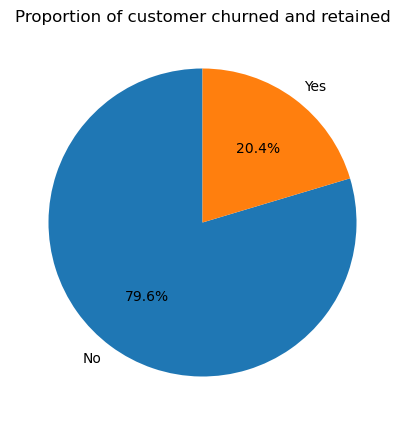

In [315]:
#Plotting a pie chart
exited_value = customer_churn['Exited'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(exited_value, labels=exited_value.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of customer churned and retained')
plt.show()

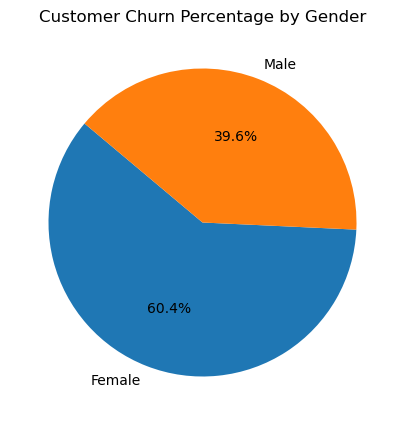

In [316]:
# Calculate churn percentage for Gender
churn_percentage = customer_churn.groupby('Gender')['Exited'].apply(lambda x: (x == 'Yes').mean() * 100)

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Percentage by Gender')
plt.show()

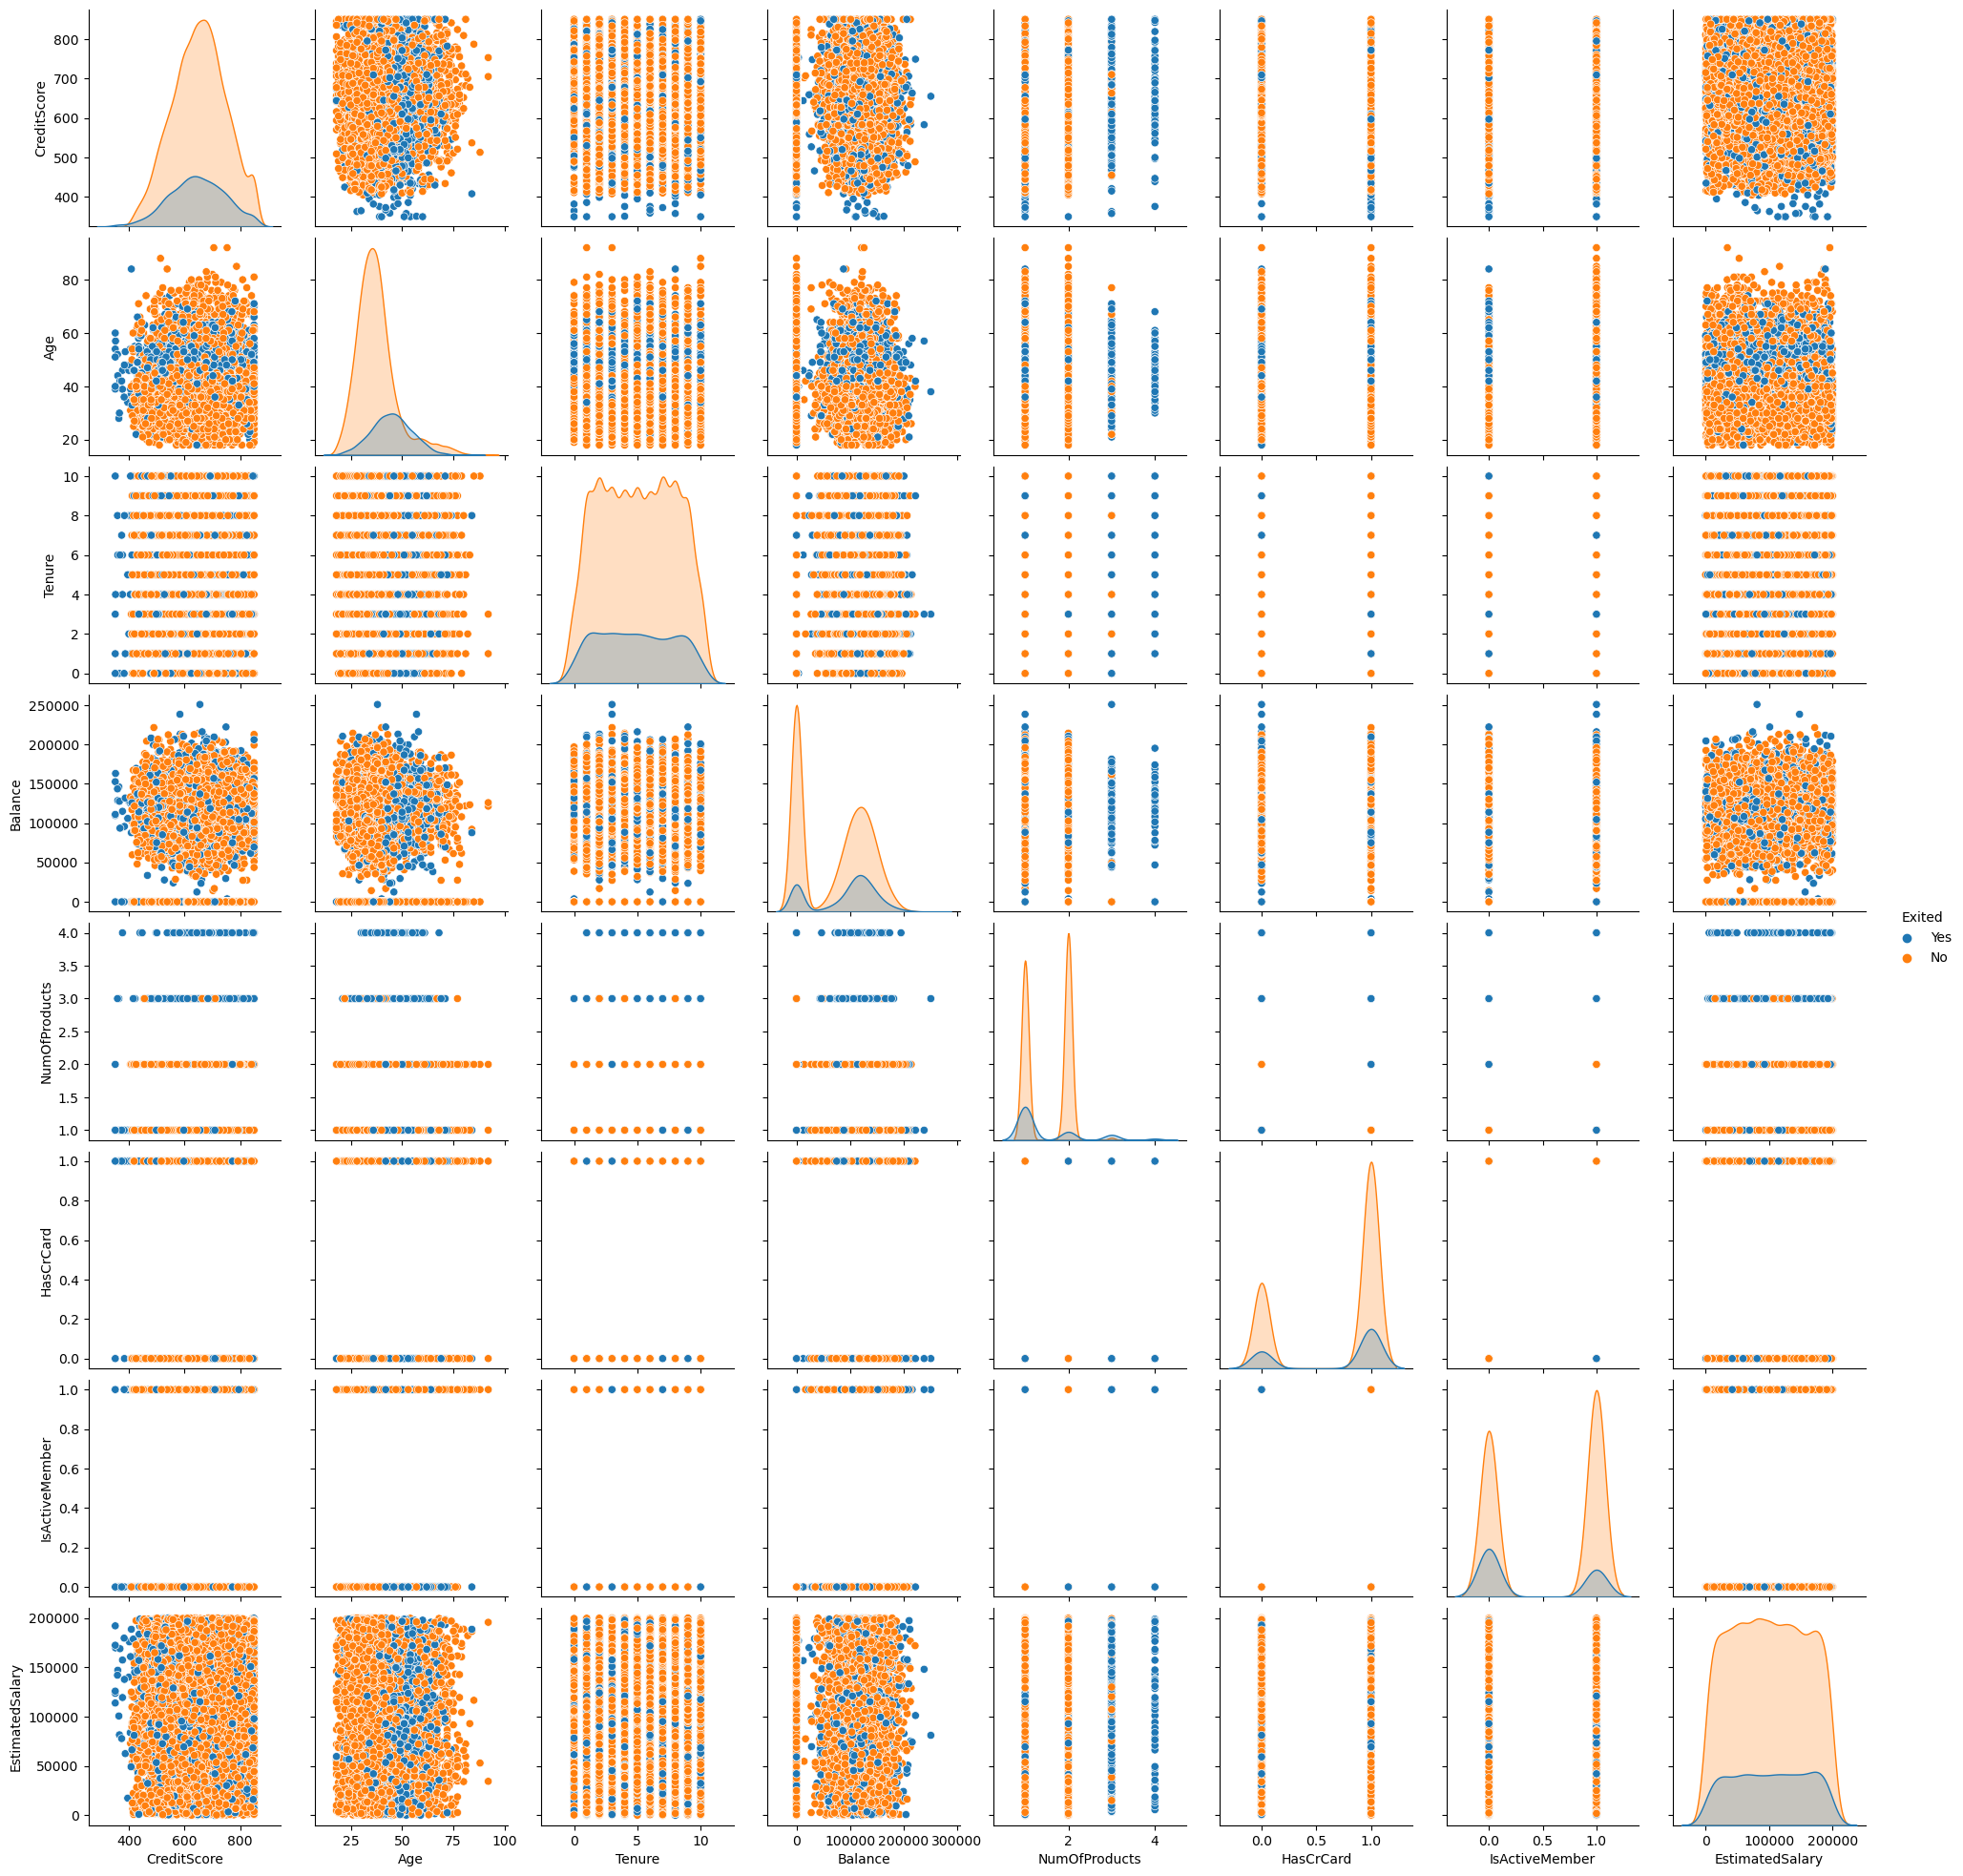

In [317]:
# Specify the columns for the pairplot
columns_for_pairplot = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']

sns.pairplot(data = customer_churn[columns_for_pairplot], hue = 'Exited')

plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

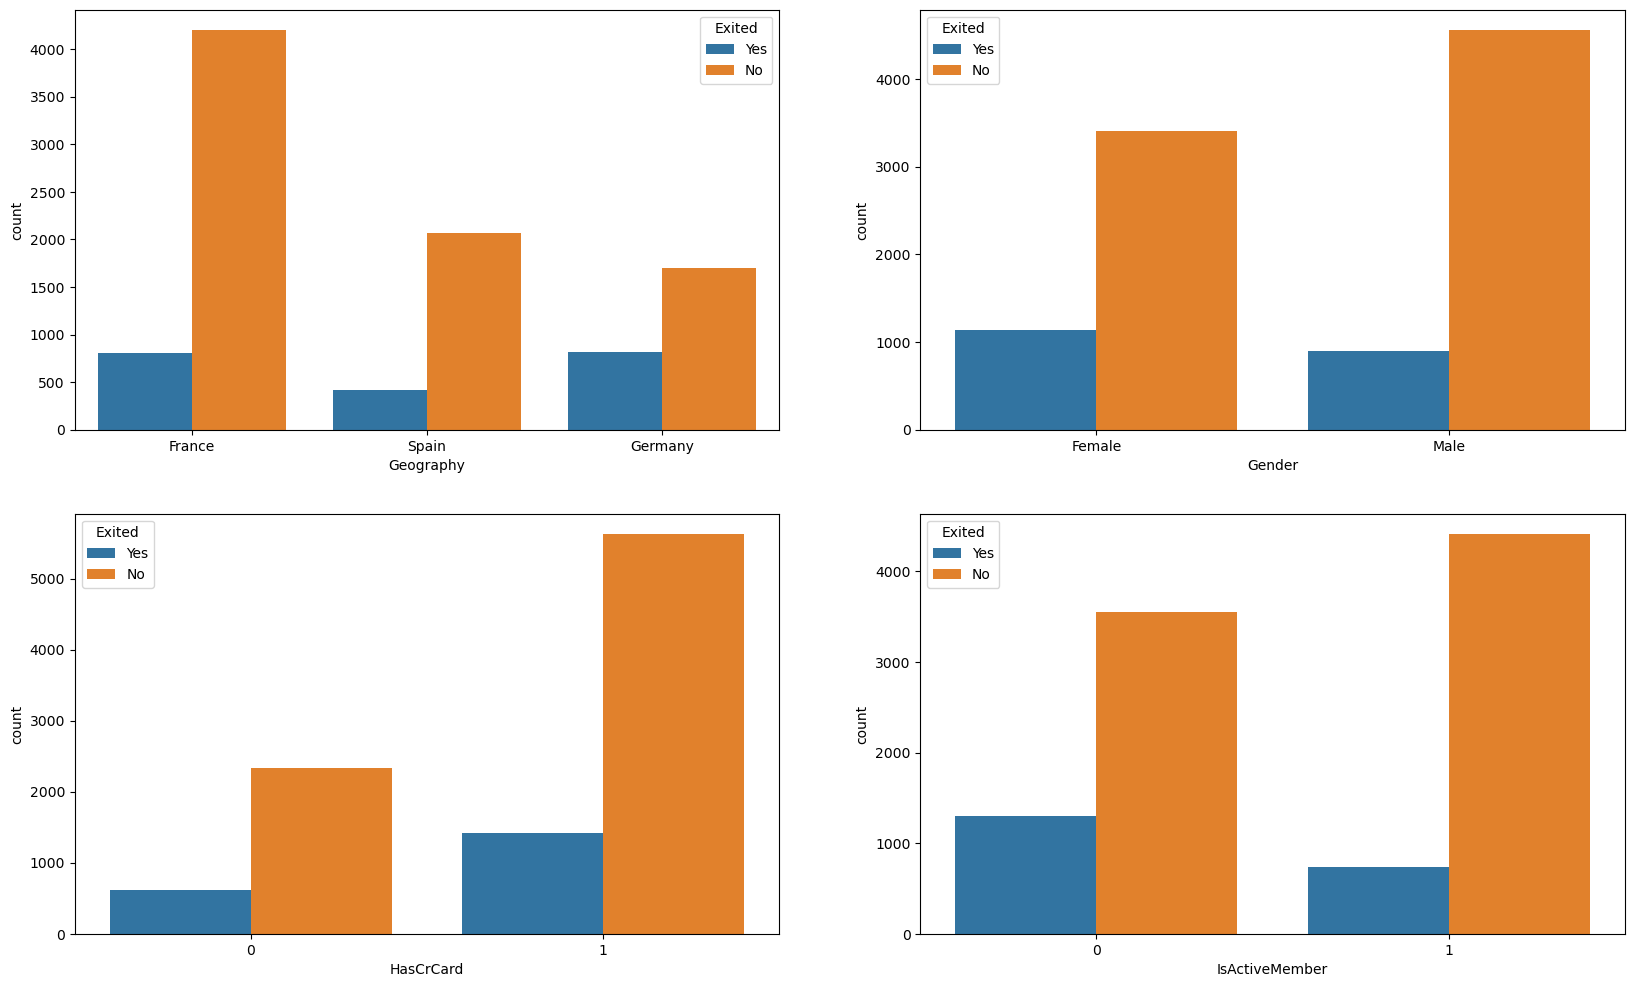

In [265]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = customer_churn, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = customer_churn, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = customer_churn, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = customer_churn, ax=axarr[1][1])

### Task 2 Feature Engineering  

In [266]:
#Converting Exited column value as numeric from object
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
customer_churn['Geography'] = label_encoder.fit_transform(customer_churn['Geography'])
customer_churn['Gender'] = label_encoder.fit_transform(customer_churn['Gender'])
customer_churn['Exited'] = label_encoder.fit_transform(customer_churn['Exited'])
customer_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [267]:
customer_churn = customer_churn.round().astype(int)

In [268]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CreditScore      10000 non-null  int32
 1   Geography        10000 non-null  int32
 2   Gender           10000 non-null  int32
 3   Age              10000 non-null  int32
 4   Tenure           10000 non-null  int32
 5   Balance          10000 non-null  int32
 6   NumOfProducts    10000 non-null  int32
 7   HasCrCard        10000 non-null  int32
 8   IsActiveMember   10000 non-null  int32
 9   EstimatedSalary  10000 non-null  int32
 10  Exited           10000 non-null  int32
dtypes: int32(11)
memory usage: 429.8 KB


In [269]:
customer_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: >

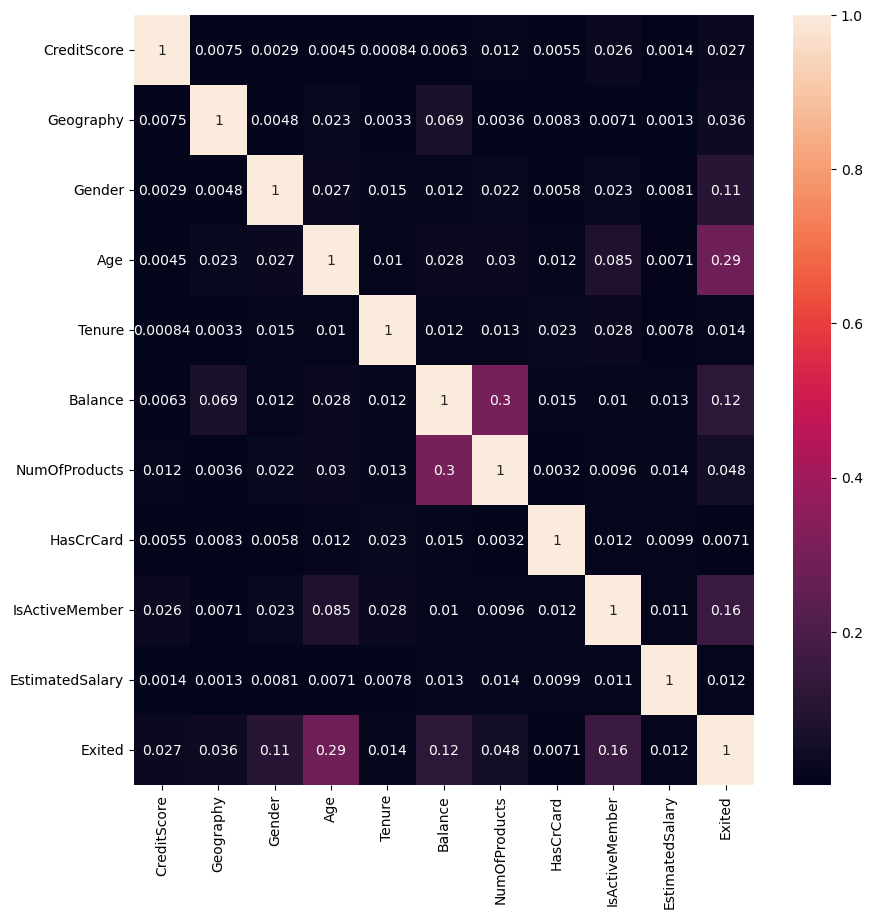

In [270]:
#plot heatmap

plt.figure(figsize=(10,10))
sns.heatmap(customer_churn.corr().abs(), annot=True)

In [272]:
# Implementing one feature scaling method
#Splitting the data into dependent and independent variables
y = customer_churn[['Exited']]
x = customer_churn.drop('Exited', axis = 1)
columns = x.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

In [273]:
data_x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.902214,-1.095988,0.293069,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021889
1,-0.440036,1.514647,-1.095988,0.197688,-1.387538,0.117352,-0.911583,-1.547768,0.970243,0.216541


In [275]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
X = data_x  # Features
y = y  # Target

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort indices of features based on their importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Select top 5 features
top_5_feature_indices = top_5_indices

# Select top 5 feature indices
top_5_feature_indices = sorted_indices[:5]

print("Top 5 feature indices:")
for index in top_5_feature_indices:
    print(index)


Top 5 feature indices:
3
9
0
5
6


In [276]:
top_5_features_df = X.iloc[:, top_5_feature_indices]

# Rename the columns with their original names
column_map = {idx: name for idx, name in zip(top_5_feature_indices, top_5_feature_names)}
top_5_features_df = top_5_features_df.rename(columns=column_map)

# Display the new DataFrame with original column names and all records
print("New DataFrame with original column names and all records:")
top_5_features_df

New DataFrame with original column names and all records:


,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts
0,0.293069,0.021889,-0.326221,-1.225848,-0.911583
1,0.197688,0.216541,-0.440036,0.117352,-0.911583
2,0.293069,0.240694,-1.536794,1.333056,2.527057
3,0.006925,-0.108911,0.501521,-1.225848,0.807737
4,0.388451,-0.365277,2.063884,0.785731,-0.911583
...,...,...,...,...,...
9995,0.006925,-0.066413,1.246488,-1.225848,0.807737
9996,-0.374601,0.027992,-1.391939,-0.306372,-0.911583
9997,-0.279220,-1.008636,0.604988,-1.225848,-0.911583
9998,0.293069,-0.125222,1.256835,-0.022613,0.807737


### Task 3 Model building and prediction

In [278]:
top_5_features_df.head()

,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts
0,0.293069,0.021889,-0.326221,-1.225848,-0.911583
1,0.197688,0.216541,-0.440036,0.117352,-0.911583
2,0.293069,0.240694,-1.536794,1.333056,2.527057
3,0.006925,-0.108911,0.501521,-1.225848,0.807737
4,0.388451,-0.365277,2.063884,0.785731,-0.911583


In [279]:
top_5_features_df.describe()

,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.289635e-16,9.894308e-17,-4.824585e-16,2.131628e-17,1.634248e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.996087e+00,-1.740261e+00,-3.109504e+00,-1.225848e+00,-9.115835e-01
25%,-6.607458e-01,-8.535954e-01,-6.883586e-01,-1.225848e+00,-9.115835e-01
50%,-1.838383e-01,1.795651e-03,1.522218e-02,3.319632e-01,-9.115835e-01
75%,4.838322e-01,8.572389e-01,6.981094e-01,8.199165e-01,8.077366e-01
max,5.062144e+00,1.737192e+00,2.063884e+00,2.795322e+00,4.246377e+00


In [280]:
top_5_features_df.shape


(10000, 5)

In [281]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(top_5_features_df, y, test_size = 0.15, random_state = 45)

In [282]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Train the regression on the training data
logreg.fit(x_train, y_train)
# Make predictions on the test data
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [283]:
from sklearn.svm import SVC
# Create a SVC classifier
classifier_rbf = SVC(kernel = 'rbf')
# Train the classifier on the training data
classifier_rbf.fit(x_train, y_train)
# Make predictions on the test data
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.84


In [330]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of DecisionTreeClassifier:", accuracy)

Accuracy of DecisionTreeClassifier: 0.812


## PART B – Supervised Machine Learning Methods (Regression)

### Scenario : Advertising expenses on radio, TV, and newspapers

### Task 1 Data Preparation

In [318]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
#importing advertising expenses on radio, TV, and newspapers report

adds =pd.read_csv("advertising.csv")
adds.head(-5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,"22,100.00"
1,44.5,39.3,45.1,"10,400.00"
2,17.2,45.9,69.3,"12,000.00"
3,151.5,41.3,58.5,"16,500.00"
4,180.8,10.8,58.4,"17,900.00"
...,...,...,...,...
190,39.5,41.1,5.8,"10,800.00"
191,75.5,10.8,6.0,"11,900.00"
192,17.2,4.1,31.6,"5,900.00"
193,166.8,42.0,3.6,"19,600.00"


In [320]:
adds.shape

(200, 4)

In [321]:
#checking null values in the dataset
adds.isnull().sum()

 TV          0
Radio        0
Newspaper    0
 Sales       0
dtype: int64

In [322]:
adds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    TV        200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3    Sales     200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [323]:
#removing white spaces from column names
adds.columns = adds.columns.str.strip()

In [324]:
# Remove commas and convert to numeric
adds['Sales'] = adds['Sales'].str.replace(',', '').astype(float)

In [325]:
adds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [326]:
adds.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15130.500000
std,85.854236,14.846809,21.778621,5283.892253
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,11000.000000
50%,149.750000,22.900000,25.750000,16000.000000
75%,218.825000,36.525000,45.100000,19050.000000
max,296.400000,49.600000,114.000000,27000.000000


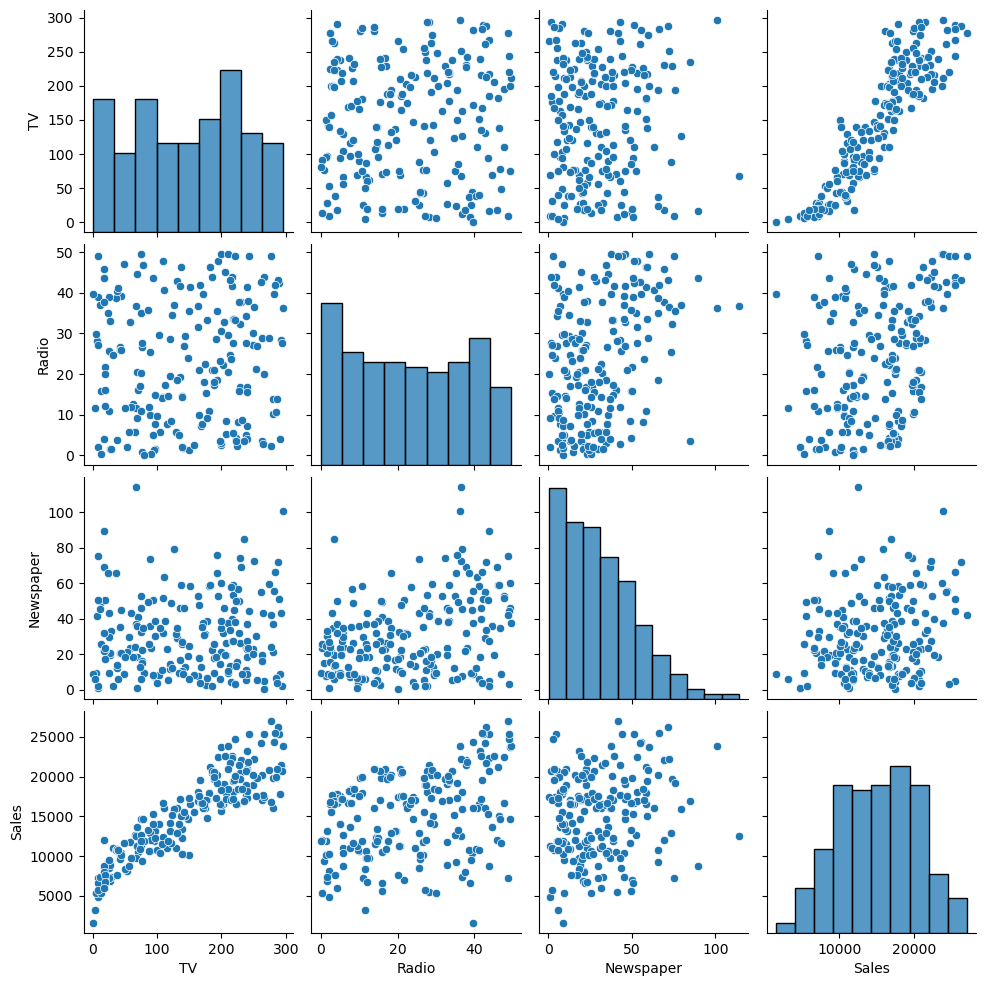

In [329]:
# Specify the columns for the pairplot
columns_for_pairplot = ['TV', 'Radio', 'Newspaper', 'Sales']
sns.pairplot(data = adds[columns_for_pairplot])

# Show the plot
plt.show()

<Axes: >

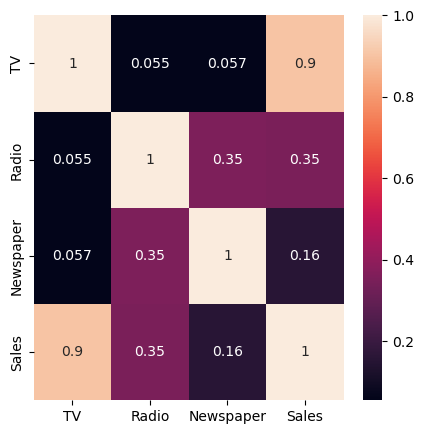

In [331]:
#plot heatmap
plt.figure(figsize=(5,5))
sns.heatmap(adds.corr().abs(), annot=True)

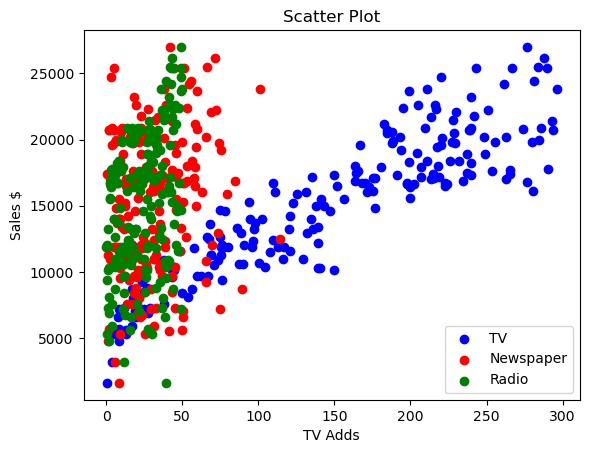

In [296]:
# Create scatter plot
plt.scatter(adds['TV'], adds['Sales'],label='TV', color='blue', marker='o')
plt.scatter(adds['Newspaper'], adds['Sales'], label='Newspaper', color='red', marker='o')
plt.scatter(adds['Radio'], adds['Sales'],label='Radio', color='green', marker='o')

plt.title('Scatter Plot')
plt.xlabel('TV Adds')
plt.ylabel('Sales $')
plt.legend()
plt.show()

### Task 2  	Feature Engineering  

In [297]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd


#Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
# Split the data into features and target variable
X = adds[['TV', 'Radio', 'Newspaper']]
y = adds['Sales']

# Create a base model (e.g., Linear Regression)
model = LinearRegression()

# Create the RFE model and select the top 2 features
rfe = RFE(model, n_features_to_select=2)

# Fit the RFE model to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

print("\nSelected Features:", selected_features)


Selected Features: Index(['TV', 'Radio'], dtype='object')


In [301]:
from sklearn.preprocessing import MinMaxScaler


# Select subset of features for scaling
subset_features = ['TV', 'Radio']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on subset of features and transform them
scaled_features = scaler.fit_transform(adds[subset_features])

# Replace original values with scaled values in DataFrame
adds[subset_features] = scaled_features

# Display the scaled DataFrame
adds.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,69.2,22100.0
1,0.148123,0.792339,45.1,10400.0
2,0.055800,0.925403,69.3,12000.0
3,0.509976,0.832661,58.5,16500.0
4,0.609063,0.217742,58.4,17900.0


In [302]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Split the data into features and target variable
X = adds[['TV', 'Radio']]
y = adds['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [303]:
# Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("\nR^2 Score:", r2)


Mean Squared Error: 1238788.6

R^2 Score: 0.9599111811553634


In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("\nR^2 Score:", r2)


Mean Squared Error: 2846616.122131541

R^2 Score: 0.9078797802624651


In [305]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create an SVR model
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("\nR^2 Score:", r2)


Mean Squared Error: 34262991.01562693

R^2 Score: -0.10879518902650487


## PART C – Time Series Trend Analysis and Forecasting 

### Scenario: Discover historical prices of Bitcoin USD (BTC-USD) 

### Task 1: Data Exploration

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
bitcoin = pd.read_csv("BTC-USD.csv")
bitcoin.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/01/2015,320.434998,320.434998,171.509995,217.46,217.464005,1.098812e+09
1,1/02/2015,216.867004,265.610992,212.014999,254.26,254.263000,7.115187e+08
2,1/03/2015,254.283005,300.044006,236.514999,244.22,244.223999,9.590983e+08
3,1/04/2015,244.223007,261.798004,214.873993,236.15,236.145004,6.723387e+08
4,1/05/2015,235.938995,247.804001,228.572998,230.19,230.190002,5.681226e+08
...,...,...,...,...,...,...,...
101,1/06/2023,27218.412110,31389.539060,24797.167970,"30,477.25",30477.251950,4.817340e+11
102,1/07/2023,30471.847660,31814.515630,28934.294920,"29,230.11",29230.111330,3.822240e+11
103,1/08/2023,29230.873050,30176.796880,25409.111330,"25,931.47",25931.472660,4.377240e+11
104,1/09/2023,25934.021480,27488.763670,24930.296880,"26,967.92",26967.916020,3.376370e+11


In [152]:
bitcoin.shape

(111, 7)

In [153]:
bitcoin.isnull().sum()

Date         0
Open         0
High         0
Low          0
 Close       0
Adj Close    0
Volume       0
dtype: int64

In [154]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       111 non-null    object 
 1   Open       111 non-null    float64
 2   High       111 non-null    float64
 3   Low        111 non-null    float64
 4    Close     111 non-null    object 
 5   Adj Close  111 non-null    float64
 6   Volume     111 non-null    float64
dtypes: float64(5), object(2)
memory usage: 6.2+ KB


In [155]:
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', ' Close ', 'Adj Close', 'Volume'], dtype='object')

In [156]:
#Removing whitespaces from column names

bitcoin.columns = bitcoin.columns.str.strip()
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [157]:
# Remove commas and convert to numeric
bitcoin['Close'] = bitcoin['Close'].str.replace(',', '').astype(float)

In [158]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin['Close'] = pd.to_numeric(bitcoin['Close'])
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,171.509995,217.46,217.464005,1.098812e+09
1,2015-01-02,216.867004,265.610992,212.014999,254.26,254.263000,7.115187e+08
2,2015-01-03,254.283005,300.044006,236.514999,244.22,244.223999,9.590983e+08
3,2015-01-04,244.223007,261.798004,214.873993,236.15,236.145004,6.723387e+08
4,2015-01-05,235.938995,247.804001,228.572998,230.19,230.190002,5.681226e+08


In [159]:
bitcoin.rename(columns={'Close': 'Price in USD'}, inplace=True)

In [160]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          111 non-null    datetime64[ns]
 1   Open          111 non-null    float64       
 2   High          111 non-null    float64       
 3   Low           111 non-null    float64       
 4   Price in USD  111 non-null    float64       
 5   Adj Close     111 non-null    float64       
 6   Volume        111 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.2 KB


In [161]:
bitcoin.describe()

,Date,Open,High,Low,Price in USD,Adj Close,Volume
count,111,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02
mean,2019-02-25 22:03:14.594594560,15553.253520,18202.879441,13456.251481,15941.288018,15941.287559,5.137779e+11
min,2015-01-01 00:00:00,216.867004,247.804001,171.509995,217.460000,217.464005,5.681226e+08
25%,2017-01-04 12:00:00,1264.170044,2055.809998,1204.695007,1817.150000,1817.149964,1.305231e+10
50%,2019-01-08 00:00:00,9145.985352,10199.565430,7090.680176,9199.580000,9199.584961,4.377240e+11
75%,2021-01-11 12:00:00,27092.904295,29998.461915,24863.732425,27849.070000,27849.071290,8.680860e+11
max,2024-05-02 00:00:00,61320.449220,68789.625000,53569.765630,61318.960000,61318.957030,2.267150e+12
std,NaN,16518.951367,18991.601587,14209.002177,16663.696461,16663.695760,5.262730e+11


In [162]:
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Price in USD', 'Adj Close', 'Volume'], dtype='object')

In [163]:
#remove unwanted columns

bitcoin.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis =1, inplace=True)
bitcoin.head()

,Date,Price in USD
0,2015-01-01,217.46
1,2015-01-02,254.26
2,2015-01-03,244.22
3,2015-01-04,236.15
4,2015-01-05,230.19


In [164]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%Y-%m')
bitcoin.head(2)

,Date,Price in USD
0,2015-01-01,217.46
1,2015-01-02,254.26


In [165]:
# set date column as index

bitcoin.set_index('Date', inplace=True)
bitcoin.tail(2)

,Price in USD
Date,
2024-01-02,43185.86
2024-05-02,42404.52


### Task 2: Trend Analysis

In [166]:
#let’s generate a time series plot using Seaborn and Matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns 

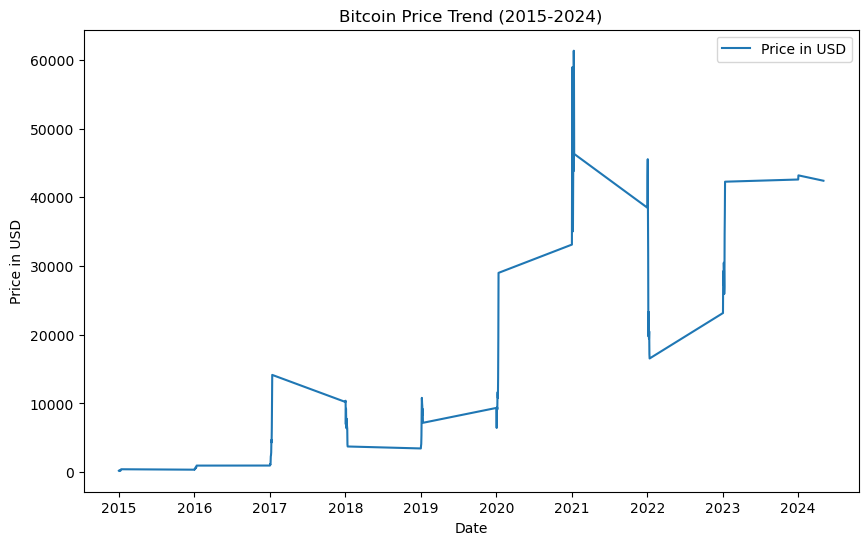

In [167]:
plt.figure(figsize=(10, 6))
sns.lineplot(bitcoin)
plt.ylabel("Price in USD")
plt.title('Bitcoin Price Trend (2015-2024)', fontsize=12)
plt.show()

In [168]:
# Let’s calculate a seven-day rolling mean for the Bitcoin price:
rolling_mean = bitcoin['Price in USD'].rolling(window=7).mean()
rolling_std = bitcoin['Price in USD'].rolling(window=7).std()

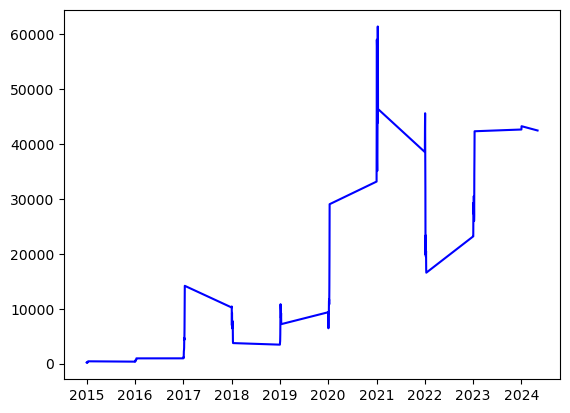

In [169]:
plt.plot(bitcoin, color="blue",label="Original Bitcoin Price Data")

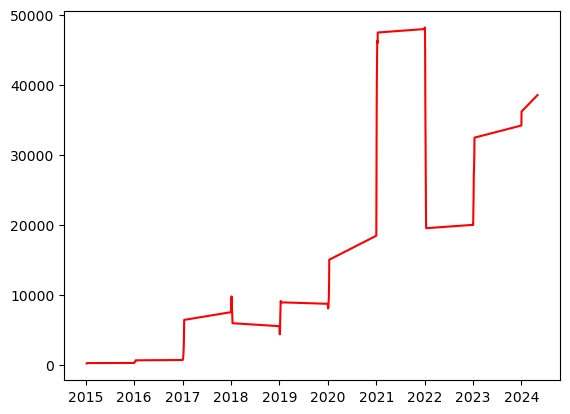

In [170]:
#Then the rolling mean:
plt.plot(rolling_mean, color="red", label="Rolling Mean Bitcoin Price Data")

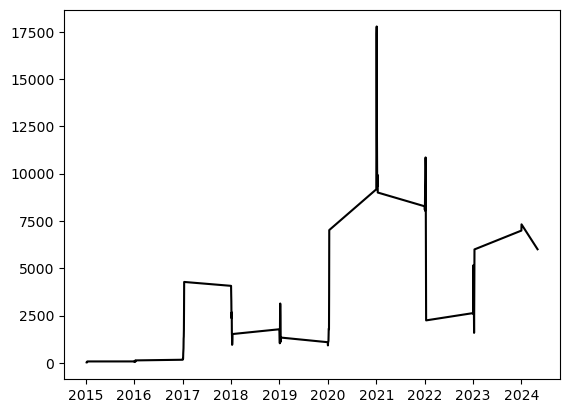

In [171]:
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Bitcoin Price Data")

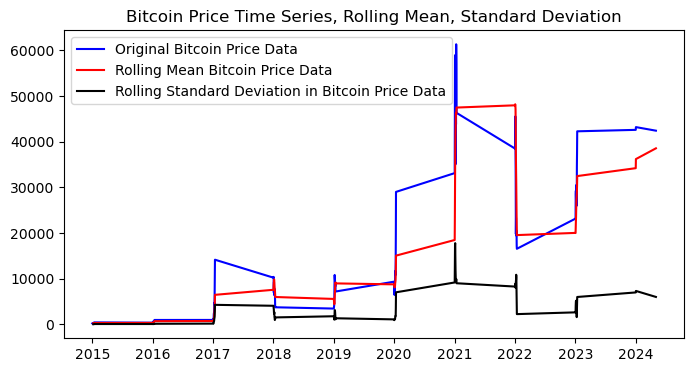

In [172]:
plt.figure(figsize=(8, 4))
plt.title("Bitcoin Price Time Series, Rolling Mean, Standard Deviation")

plt.plot(bitcoin, color="blue",label="Original Bitcoin Price Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Bitcoin Price Data")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Bitcoin Price Data")



### Task 3: Seasonality Assessment

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

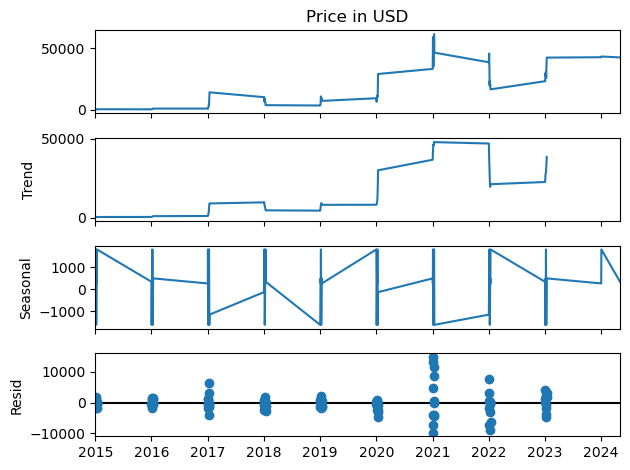

In [174]:
#Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = seasonal_decompose(bitcoin['Price in USD'],model='additive', period=7)
decompose.plot()
plt.show()

* From this plot, we can clearly see the increasing trend in Bitcoin Price and the seasonality patterns in the rise and fall in values each year.

In [212]:
# split the data into training and testing sets
split_date = pd.to_datetime("2022-06", format='%Y-%m')

# Split the data into training and testing sets
train = bitcoin[bitcoin.index < split_date]
test = bitcoin[bitcoin.index >= split_date]

# Print the number of data points in each set
print("Training set size:", len(train))
print("Testing set size:", len(test))

Training set size: 96
Testing set size: 15


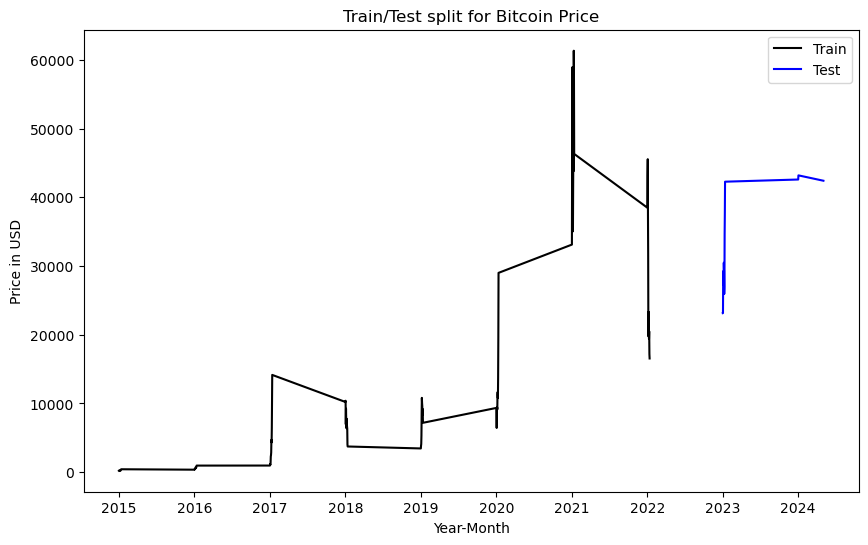

In [213]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Price in USD'], color='black', label='Train')
plt.plot(test.index, test['Price in USD'], color='blue', label='Test')

# Adding title, labels, and legend
plt.title("Train/Test split for Bitcoin Price")
plt.ylabel("Price in USD")
plt.xlabel('Year-Month')
plt.legend()

# Display plot
plt.show()

### Task 5: Predictions and Recommendation

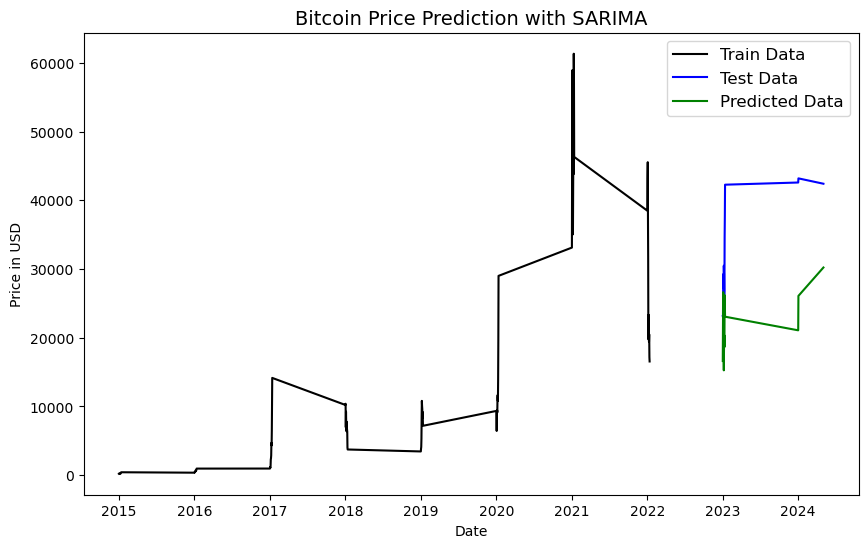

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Fit SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train['Price in USD'], order=order, seasonal_order=seasonal_order)
sarima_model = model.fit(disp=False)

# Make predictions
forecast = sarima_model.forecast(steps=len(test))

# Plot original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Price in USD'], color='black', label='Train Data')
plt.plot(test.index, test['Price in USD'], color='blue', label='Test Data')
plt.plot(test.index, forecast, color='green', label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price Prediction with SARIMA', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [215]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Price in USD'], forecast))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 11815.237705182932
